# Netflix's next banger

## 1. Background

Netflix is a member-based internet entertainment service founded in 1997. The service allows members to watch tv-series, movies and documentaries through a streaming software on internet-connected devices against a monthly fee. Netflix’s content relies on a complex structure of algorithms that watches customer’s online use and are supposed to optimize satisfying decisions. Thus the company is in great need of user data. (Clares-Gavilán, Fernández-Manzano och Neira 2016, 568-576)

The company’s operational environment is characterized by hands-off approach to management. The workforce is heterogeneous, about 3,500 people who 
leaders trust to have the company’s best interests at heart and act correspondingly. (Gulati 2018, 4-13).  Furthermore a majority of Netflix’s content is from outside sources and the company’s operational flexibility is limited by outside partners (Ciejka 2018, 3-38).


## 2. Problem description

As an effect of high competition and slow growth in the number of new subscribers Netflix share price has declined in fall 2019, hence Netflix wants to maximize the success of their next creation. The problem lies in not knowing what will be best received by the public. (Ny Teknik, 2019)

Additionally, by having some of its content come from outside sources, part of the problem becomes choosing the right content. If Netflix have to choose between several newly released movies or series, how will they know which one has the best chance of success?

In our project we will gather data from movies and their scripts. We will look for commonly used words, actors, genres and directors to predict which attributes Netflix should be the most interested in when creating their next movie and also which outside-produced movies they should add to their assortment. Finally upcoming movies will also be discussed with our analysed data in mind.


## 3. Previous Studies
There are many different researches that has been carried out in the field using different approaches. Most of the studies found focuses on extracting data from social media to map how users online discussions, like reviews etc can predict a movies success. There are fewer studies that focuses on the attributes of a movie to explore how this is related to a movies success. 

In Ahmad et. al’s study Movie Success Prediction Using Data Mining (2017) the authors presents a study which aims to predict a movies success based on the weighted attributes budget, actors, director, producer, set locations, story writer, movie release day, competing movie releases at the same time, music, release location and target audience. The weighing is done using a mathematical model. It’s stated that “success cannot be predicted based on a particular attribute” and therefore weighing of multiple attributes will be integrated in this study as well. Furthermore the study gives a basic framework in how to value different attributes and what method to consider for the data mining. Lastly, the article shows how classification and clustering can be used in the context of prediction. It also gives a reference point to compare the results of this study to. 

Another similar study is Hammad Afzals article Prediction of Movies popularity Using Machine Learning Techniques (2016) which describes how machine learning approaches can predict an movies success based on datasets of IMDB scores and attributes. The most important finding of this article regarding the work of this report is that the attributes which contributed with most information was metascore and number of votes for each movie, Oscar awards won by the movies and the number of screens the movie is going to be screened which is considered in the choosing of attributes for this report. 

Furthermore Meenakshi et al also try to determine a movies success using several of the same attributes in their 2018 study. In the paper A Data mining Technique for Analyzing and Predicting the success of Movie they employ a decision tree together with clusters to categorize movies as either “Flop”, “Average” or “Hit”. They found that budget was no indication of how well a movie would be rated, and that genre was the most important node in their decision tree. (Meenakshi et al. 2018, 1-6)

The paper Predicting movie success and academy awards through sentiment and social network analysis talks about how much influence online communities have on the actual success of movies. The paper focuses on a model that that predicts academy award nominees by researching the opinions of online communities. Afterwards it uses the same approach to see if there is a correlation between online communities and movie success at the box office. By doing this, the study were able to predict different real events, such as nine academy award winners, by considering and using mentioned models on social networks in movie communities online.(Jonas Sebastian Krauss et al. 2008, 9-10). 


## 4. Methodology

The study will use the following methodology:
- Data extraction
- Data processing (removal of non relevant attributes)
- Modelling and classification
- Testing (comparison) and evaluation

Data attributes of choice:
- genre
- actors
- director
- writers
- producer
- composer
- number of votes 

Starting out, there was two clear options for measuring success of a movie; highest user ratings and most money-making at box office. Considering the client, Netflix, whose primary focus is to serve home watchers, ratings are more relevant. Also, money is a tougher attribute, both to measure over time and to find data on. Therefore success in this paper is defined as rating and more specifically Imdb’s rating system. 

As for deciding on datasets, we extracted most of our data from Imdb. It was handily available and provided many aspects of the different movies. However, we decided to go with a different set for our “base”- data of movies and went with a set from TmDB. We took a set of 45000 movies and used these instead of Imdb’s huge repertoar. 

To make use of all this data we decided to go with a decision tree. Our hope was to create something that can take a list of genres, actors and a director and predict how a movie containing these would be rated. 

The decision tree approach was selected due to the fact that the data had few attributes and simple relationships and that we wanted a explicit logic in order to describe the results to Netflix in an intuitive way. 


### 4.1 Data collection

These collected datasets provided us with 4 different tables to use in our cleaning/processing part. In short, they are:
- “Movies_metadata.csv”, The complete list of the movies from TMDbs database, complete with an IMDb_id.
- “title_principals.tsv”, IMDbs table of connections between a movie_id and person_id, complete with the role of the person in that movie (actor, director, composer…)
- “data_ratings.tsv”, Imdbs table of connections between a movie_id and average rating and number of ratings
- “movie_names.tsv” Imdbs table of connections between a person_id and information about the person.


In [ ]:
import numpy as np
import csv

movie_data = []
title_principals = []
movie_names = []

with open('movies_metadata.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        movie_data.append(row)
        
with open('title_principals.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        title_principals.append(row)

with open('movie_names.tsv', encoding="utf8") as tsvfile4:
    reader_rating = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_rating:
        movie_names.append(row)   

In [10]:
ratings = []

with open('data_ratings.tsv', encoding="utf8") as tsvfile4:
    reader_titles = csv.reader(tsvfile4, delimiter='\t')
    for row in reader_titles:
        ratings.append(row)

Defining some functions needed later:

In [3]:
def get_number(string):
    try:
        return (int) (string[2:])
    except:
        return 0
    
def custom_sort(t):
    return t[0]

# Formats a string read from .csv file intended to be an array.
def string_to_array(arraystring):
    arraystring = arraystring.replace(' ', '')
    arraystring = arraystring.replace('[', '')
    arraystring = arraystring.replace(']', '')
    arraystring = arraystring.replace('\'', '')
    array = arraystring.split(',')
    return array

def string_to_array_null(arraystring):
    arraystring = arraystring.replace(' ', '')
    arraystring = arraystring.replace('[', '')
    arraystring = arraystring.replace(']', '')
    arraystring = arraystring.replace('\'', '')
    array = arraystring.split(',')
    if(len(array) == 0):
        return None
    else:
        return array

def try_parse_float(input):
    try:
        number = float(input)
    except:
        number = -1
    return number

# Takes a actor-id and returns a name
def get_name(actor):
    actor_id = get_number(actor)
    count = 0
    for name in movie_names:
        count += 1
        if(actor == name[0]):
            return name[1]
        
def get_num_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[2]

def get_avg_rating(id):
    for rating in ratings:
        if(rating[0] == id):
            return rating[1]
        
def clean_string(string):
    string = string.replace(' ', '')
    string = string.replace('[', '')
    string = string.replace(']', '')
    string = string.replace('\'', '')
    return string


### 4.3 Data cleaning and processing 

From the “Movie_metadata” table the attributes title, IMDb ID, genre and release date was extracted. These attributes were joined with “title_principals” on IMDb ID and the crew associated with the movie was retrieved. Thereafter all participating person_ID was changed to their names from the tabe “movie_names”. Lastly ratings were added from “data_ratings”, that were joined with IMDb ID.


In [160]:
movie_data_np = np.array(movie_data[1:])
movie_data_selected_attributes = []

# Selecting attributes
for movie in movie_data_np:
    if(len(movie) > 22):
        movie_data_selected_attributes.append([movie[6], movie[3], movie[8], movie[14], movie[22], movie[23]])
        
movie_data_stripped_genres = []

# Rearranging genres
for movie in movie_data_selected_attributes:
    genre_arr = movie[1].split('\'')
    genres = []
    for i in range(5, len(genre_arr), 6):
        genres.append(genre_arr[i])       
    movie_data_stripped_genres.append([movie[0], genres, movie[2], movie[3], movie[4], movie[5]])

movies_above_7 = []

movie_data_stripped_genres.sort(key=custom_sort)

# Filter out movies with rating < 7.0
for movie in movie_data_stripped_genres:
    if(try_parse_float(movie[4]) >= 7.0):
        movies_above_7.append(movie)
        
movies_above_7 = movies_above_7[3:]
movies_with_crew = []

# Iterate through title_principals and movies_above_7, join on id.
j = 0
movie_id = 0
for i in range(len(title_principals)):
    title_id = get_number(title_principals[i][0])
    while(movie_id < title_id):
        j += 1
        if(j > len(movies_above_7) -1):
            break
        movie_id = get_number(movies_above_7[j][0])
    if(movie_id == title_id):
        if(j > len(movies_above_7) -1):
            break
        movies_above_7[j].append([title_principals[i][2],title_principals[i][3]])
        
movies_with_actors = []

# Remove non-matches, missing values
for movie in movies_above_7:
    if(len(movie) > 6):
        movies_with_actors.append(movie)

This list is saved as "movies_and_crew.csv", to avoid the need to read all these huge .tsv and .csv files again 

In [8]:
with open('movies_and_crew.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actors)

In [3]:
import csv
movies_and_crew = []

with open('movies_and_crew.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_and_crew.append(row)

As a part of the cleaning and processing all movies with a number of votes below 1000 were removed in order to ensure the scoring was accurate. The movies produced before 1960 has also been removed. Deceased participating persons of movies are kept on the basis that Netflix can be ought to add already existing movies to their sortiment in contrast to just producing new material. 

In [ ]:
movies_after_1960 = []

# Remove movies before 1960
for movie in movies_and_crew:
    if(try_parse_float(movie[3].split('-')[0]) >= 1960):
        movies_after_1960.append(movie)
        
movies_with_actor_names = []
progress = 0
# Replace actor ids with names
for movie in movies_after_1960:
    actor_info = []
    crew = []
    for actor in movie[6:]:
        actor_info = string_to_array(actor)
        actor_info[0] = get_name(actor_info[0])
        crew.append(actor_info)
    progress += 1
    if(progress % 10 == 0):
        print("Progress...", round(progress/49, 2), "%")
    movies_with_actor_names.append([movie[:5], crew])

This operation was a quite heavy task, taking 30-40 minutes. To avoid doing this again we saved the result and use that file as a starting point for further preprocessing and analysing. 

In [111]:
with open('movies_and_crew_names.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_with_actor_names)

A problem we ran into when saving and reading .csv files was that lists inside lists did not work as expected. They were saved/read as strings, and therefore had to be formatted each time we started from this point in the project.

In [7]:
import csv

movies_with_actor_names = []

with open('movies_and_crew_names.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies_with_actor_names.append(row)

movies_with_actor_names = movies_with_actor_names[1:]
movies = []

# Format lists to actual lists 
for movie in movies_with_actor_names:
    info = string_to_array(movie[0])
    crew = string_to_array(movie[1])
    crew_roles = []
    for i in range(0, len(crew), 2):
        crew_roles.append([crew[i], crew[i+1]])
    movies.append([info, crew_roles])

We realised the ratings on our movies were from Tmbd and not Imdb. We want as many user votes as possible, so imdbs rating were added instead. Structure of the array is also updated and saved

In [12]:
new_movies = []

for movie in movies:
    new_movie = []
    avg_rating = get_avg_rating(movie[0][0])
    num_rating = get_num_rating(movie[0][0])
    for info in movie[0][0:len(movie[0] + movie[1])-11]:
        new_movie.append(info)
    new_movie.append(avg_rating)
    new_movie.append(num_rating)
    for crew in movie[1]:
        new_movie.append(crew)
    new_movies.append(new_movie)
    
for movie in new_movies:
    try:
        movie[1] = movie[1].replace('\"', '')
        movie[2] = movie[2].replace('\"', '')
        movie[3] = movie[3].replace('\"', '')
    except:
        next

When the correct ratings had been added, we saved our progress once more in another .csv-file.

In [175]:
with open('complete.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(new_movies)

In [17]:
import csv

movies = []

with open('complete.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

The code below was run on our table from "complete.csv". We wanted to separate all crew members in their corresponding list. The complete table was transformed to contain the following columns:
- Imdb_id
- [Genres]
- Release Year
- Rating 
- [Actors/Actresses]
- [Director] 
- [Writer]
- [Composer]
- Number of Ratings

In [383]:
def get_nr_of_crew(movie):
    count = 0
    for part in movie:
        try:
            if(part[0] == '['):
                count += 1
        except:
            next
    return count

movies_sorted_crew = []
count = 0
for movie in movies:
    full_arr = []
    genres = []
    actors = []
    directors = []
    writers = []
    producer = []
    composer = []
    count += 1
    genre_count = 0
    nr_of_crew = get_nr_of_crew(movie)
    for member in movie[-nr_of_crew:]:
        member_arr = string_to_array(member)
        try:
            if(member_arr[1] == "actor" or member_arr[1] == "actress" or member_arr[1] == "self"):
                actors.append(member_arr[0])
            if(member_arr[1] == "director"):
                directors.append(member_arr[0])
            if(member_arr[1] == "writer"):
                writers.append(member_arr[0])
            if(member_arr[1] == "producer"):
                producer.append(member_arr[0])
            if(member_arr[1] == "composer"):
                composer.append(member_arr[0])
        except:
            print("not a member", member_arr, member, count)
    try:
        for item in movie[1:-(nr_of_crew + 2)]:
            genre_count += 1
            if(is_genre(item)):
                genres.append(item)
        full_arr.append(movie[-(nr_of_crew + 2)])
        full_arr.append(genres)
        full_arr.append(movie[-(nr_of_crew + 1)])
        full_arr.append(actors)
        full_arr.append(directors)
        full_arr.append(writers)
        full_arr.append(producer)
        full_arr.append(composer)
        movies_sorted_crew.append(full_arr)
    except:
        print("Error at index", count)

Some rows could not be associated with actors, directors or other cast members. In the discussion of strategies about handling this different options were discussed such as: 

- Removing all rows with missing attributes
- Removing all rows where a certain missing attribute
- Replace the missing attributes
- Keep all rows

The method that were chosen was replacing all empty attributes with zero hence giving the attribute an almost non existing rating. This was done later in project.


In [384]:
with open('complete_formatted.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(movies_sorted_crew)

When saved as "complete_formatted.csv" we created yet another checkpoint to start from.

To be able to construct a decision tree, values of the attributes had to be transformed to nominal data in order for it to be measurable in a meaningful way. This was done by taking all crew members of each movie and calculating an average on their performance. Crew members including both actors, writers and directors. The performance were calculated by the following formula:

$${\frac{\text{Total Rating Of Movies Member Apperad In}}{\text{Number Of Movies Member Apperad In}}}$$

Actors that had participated in less than 5 movies were later in the analysis removed, or rather, given a “performance score” of 0. This after noticing some actors starring in a single movie with high rating, which is misleading to show successful movies based on actors.

The code below shows the process of extracting all unqiue crew members, calculating their "Performance score" and saving it as separate .csv files. As explained, the code was run twice, one time to give all crew members a score and one time to give crew members with an appearnce of 5 movies or more a score.

In order to give the genres a measurable value they were transformed to dummy-variables where, for example [Drama, Horror] = 1, [Comedy, Drama] = 2 etc. The genres-groups were limited to two genres for each group where the two main genres for each movie were selected and sorted so that:

$$[\text{Genre A, Genre B}] ↔ [\text{Genre B, Genre A}].$$ 

Title, Release Year and imdb_id was not processed and not included in the data used by the tree during its first evaluation.

In [38]:
# Box 1 (It takes some time to generate performance scores, about 2-3 minutes)

import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
import graphviz
from graphviz import Source
from sklearn import tree

movies = []

with open('complete_formatted.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)

unique_actors = []
unique_directors = []
unique_writers = []
unique_producers = []
unique_composers = []
unique_genres = []

for movie in movies:
    genres = string_to_array(movie[0])
    top2genres = genres[0:2]
    top2genres.sort()
    if not(top2genres in unique_genres):
        unique_genres.append(top3genres)
        unique_genres.sort()
    for actor in string_to_array(movie[3]):
        if not (actor in unique_actors):
            unique_actors.append(actor)
    for director in string_to_array(movie[4]):
        if not (director in unique_directors):
            unique_directors.append(director)
    for writer in string_to_array(movie[5]):
        if not (writer in unique_writers):
            unique_writers.append(writer)
    for producer in string_to_array(movie[6]):
        if not (producer in unique_producers):
            unique_producers.append(producer)
    for composer in string_to_array(movie[7]):
        if not (composer in unique_composers):
            unique_composers.append(composer)

In [48]:
# Box 2

def get_avg_scores(l, index, atleast):
    end = len(l)
    avg_scores = []
    for person in l:
        total_score = 0
        count = 0
        for movie in movies:
            if(person in string_to_array(movie[index])):
                count += 1
                total_score += try_parse_float(movie[2])
        if(count >= atleast):
            avg_scores.append([person, total_score/count])
    return avg_scores

atleast = 1

actor_avg_scores = get_avg_scores(unique_actors, 3, atleast)
director_avg_scores = get_avg_scores(unique_directors, 4, atleast)
writer_avg_scores = get_avg_scores(unique_writers, 5, atleast)
producer_avg_scores = get_avg_scores(unique_producers, 6, atleast)
composer_avg_scores = get_avg_scores(unique_composers, 7, atleast)

AttributeError: 'list' object has no attribute 'replace'

In [40]:
# Box 3

with open('actors.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(actor_avg_scores)
with open('directors.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(director_avg_scores)
with open('writers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(writer_avg_scores)
with open('producers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(producer_avg_scores)
with open('composers.csv', 'w', encoding='utf-8') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(composer_avg_scores)

For the sake of analysis and readability, 2 Dataframes are created:
- movies_df, containing all data saved in "complete_formatted.csv", displaying our movie and their list of crew members.
- full_arr_df, with separated crew member lists and their individual scores displayed together. 

In [46]:
# Box 4

movies = []

with open('complete_formatted.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            movies.append(row)
            
def get_perf(person, l):
    for pair in l:
        if(person == pair[0]):
            return pair[1]
    return 0

def build_performance_pairs(arr, movie, index, perf_list, size):
    length = len(movie[index])
    for i in range(size):
        if(i < length):
            arr.append(movie[index][i])
            arr.append(round(get_perf(movie[index][i], perf_list), 2))
        else:
            arr.append(0)
            arr.append(0)
        
def get_genre_nr(genres):
    for i in range(len(unique_genres)):
        if(unique_genres[i] == genres):
            return i

for movie in movies:
    movie[0] = string_to_array(movie[0])
    movie[3] = string_to_array(movie[3])
    movie[4] = string_to_array(movie[4])
    movie[5] = string_to_array(movie[5])
    movie[6] = string_to_array(movie[6])
    movie[7] = string_to_array(movie[7])
            
movies_df = pd.DataFrame(movies)

full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs(movies_with_numbers, movie, 3, actor_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

The first DataFrame is displayed, showing Genres, number of votes, actors, director, writers, producers and composers:

In [42]:
# Box 5

movies_df = pd.DataFrame(movies_df)
movies_df = movies_df.rename(columns={0:"Genres",1:"Number_of_votes",2:"Rating",3:"Actors",4:"Director",5:"Writers",6:"Producers",7:"Composers"})
movies_df

,Genres,Number_of_votes,Rating,Actors,Director,Writers,Producers,Composers
0,"[Comedy, Crime, Thriller]",3392,7.3,"[JackHawkins, NigelPatrick, RogerLivesey, Rich...",[BasilDearden],"[JohnBoland, BryanForbes]",[MichaelRelph],[PhilipGreen]
1,"[Drama, Romance]",2701,7.9,"[InnokentiySmoktunovskiy, TatyanaSamoylova, Va...",[MikhailKalatozov],"[GrigoriyKoltunov, ValeriOsipov, ViktorRozov]",[],[NikolaiKryukov]
2,[Drama],1572,6.9,"[AnthonyQuinn, YôkoTani, ""PeterOToole"", CarloG...",[NicholasRay],"[HansRuesch, FrancoSolinas, BaccioBandini]",[MalenoMalenotti],[AngeloFrancescoLavagnino]
3,[Drama],1512,7.3,"[JessHahn, MichèleGirardon, VanDoude, PaulBisc...",[ÉricRohmer],[PaulGégauff],[ClaudeChabrol],[LouisSaguer]
4,"[Drama, Horror, Thriller]",23803,7.7,"[PierreBrasseur, AlidaValli, JulietteMayniel, ...",[GeorgesFranju],"[PierreGascar, JeanRedon, PierreBoileau, Thoma...",[],[]
...,...,...,...,...,...,...,...,...
4957,"[Drama, History, War]",44203,8.5,"[MarcMenchaca, AlexanderSkarsgård, JamesRanson...",[],[],[],[]
4958,[Drama],14548,7.2,"[""VincentDOnofrio"", RodrigoSantoro, DiegoBonet...","[JeffZimbalist, MichaelZimbalist]",[],"[ColinWilson, BrianGrazer, IvanOrlic, KimRoth]",[]
4959,"[Drama, Romance]",8545,7.1,"[LudivineSagnier, LouisGarrel, ClotildeHesme, ...",[ChristopheHonoré],[],[PauloBranco],[AlexBeaupain]
4960,[Documentary],57,7.3,"[IrvingFine, RobertWagner, DelArmstrong, Jacki...",[CaroleLanger],[LukeSacher],[],[TimmyCappello]


The second DataFrame is displayed. All lists have been broken up and a rating of a persons "performance" is showing. The genres have been grouped together and are displayed by an index, corresponding to the index of the genre group in the list unique_genres.

In [43]:
# Box 6

pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})
full_arr_df[0:50]

,Rating,Genre_Group,Nr_of_Ratings,Actor1,Actor1Perf,Actor2,Actor2Perf,Actor3,Actor3Perf,Dir,DirPerf,Writer1,Writer1Perf,Writer2,Writer2Perf,Writer3,Writer3Perf,Producer,ProducerPerf,Composer,ComposerPerf
0,7.3,NaN,3392,JackHawkins,7.40,NigelPatrick,7.30,RogerLivesey,7.30,BasilDearden,7.33,JohnBoland,7.30,BryanForbes,7.37,0,0.00,MichaelRelph,7.33,PhilipGreen,7.50
1,7.9,NaN,2701,InnokentiySmoktunovskiy,8.00,TatyanaSamoylova,7.90,VasiliyLivanov,8.40,MikhailKalatozov,8.05,GrigoriyKoltunov,7.90,ValeriOsipov,7.90,ViktorRozov,7.90,,7.39,NikolaiKryukov,7.90
2,6.9,NaN,1572,AnthonyQuinn,7.74,YôkoTani,6.90,"""PeterOToole""",7.40,NicholasRay,6.95,HansRuesch,6.90,FrancoSolinas,7.45,BaccioBandini,6.90,MalenoMalenotti,6.90,AngeloFrancescoLavagnino,6.60
3,7.3,NaN,1512,JessHahn,7.40,MichèleGirardon,7.30,VanDoude,7.30,ÉricRohmer,7.50,PaulGégauff,7.22,0,0.00,0,0.00,ClaudeChabrol,7.30,LouisSaguer,7.30
4,7.7,NaN,23803,PierreBrasseur,7.20,AlidaValli,6.93,JulietteMayniel,7.70,GeorgesFranju,7.70,PierreGascar,7.70,JeanRedon,7.70,PierreBoileau,7.70,,7.39,,7.46
5,7.9,NaN,66360,Jean-PaulBelmondo,7.32,JeanSeberg,7.30,DanielBoulanger,7.90,Jean-LucGodard,7.08,FrançoisTruffaut,7.90,ClaudeChabrol,7.90,0,0.00,GeorgesdeBeauregard,7.47,MartialSolal,7.90
6,8.1,NaN,3928,SetsukoHara,8.00,YôkoTsukasa,7.83,MarikoOkada,7.28,YasujirôOzu,8.03,TonSatomi,8.10,KôgoNoda,8.03,0,0.00,ShizuoYamanouchi,7.90,TakanobuSaitô,7.90
7,7.2,NaN,1074,RichardAttenborough,7.20,PierAngeli,7.20,MichaelCraig,7.20,GuyGreen,7.60,RichardGregson,7.20,BryanForbes,7.37,0,0.00,,7.39,MalcolmArnold,6.90
8,8.3,NaN,148822,JackLemmon,7.42,ShirleyMacLaine,7.11,FredMacMurray,8.30,BillyWilder,7.73,I.A.L.Diamond,7.62,0,0.00,0,0.00,,7.39,AdolphDeutsch,8.30
9,7.9,NaN,23649,GabrieleFerzetti,6.88,MonicaVitti,7.53,LeaMassari,7.65,MichelangeloAntonioni,7.52,ElioBartolini,7.90,ToninoGuerra,7.61,0,0.00,AmatoPennasilico,7.90,GiovanniFusco,7.55


Our decision tree seemed to only understand integers. We modified all needed columns:

strings -> floats -> multiplying by 100 (to not loose decimal points accuracy) -> ints.

In [44]:
# Box 7

full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)

test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

### 4.3 Modeling and Classification

We began by defining what our classes of success should be. To start with, we went with rating and described it as following:

$$\text{Rating} < 8.0 = \text{Failure}$$
$$8.0 \leq \text{Rating} \leq 10.0 = \text{Success}$$

This is an easy first step since we have ratings already connected to each movie and can compare the effectiveness of our tree with some samples.

The following is code generating our first test tree. 

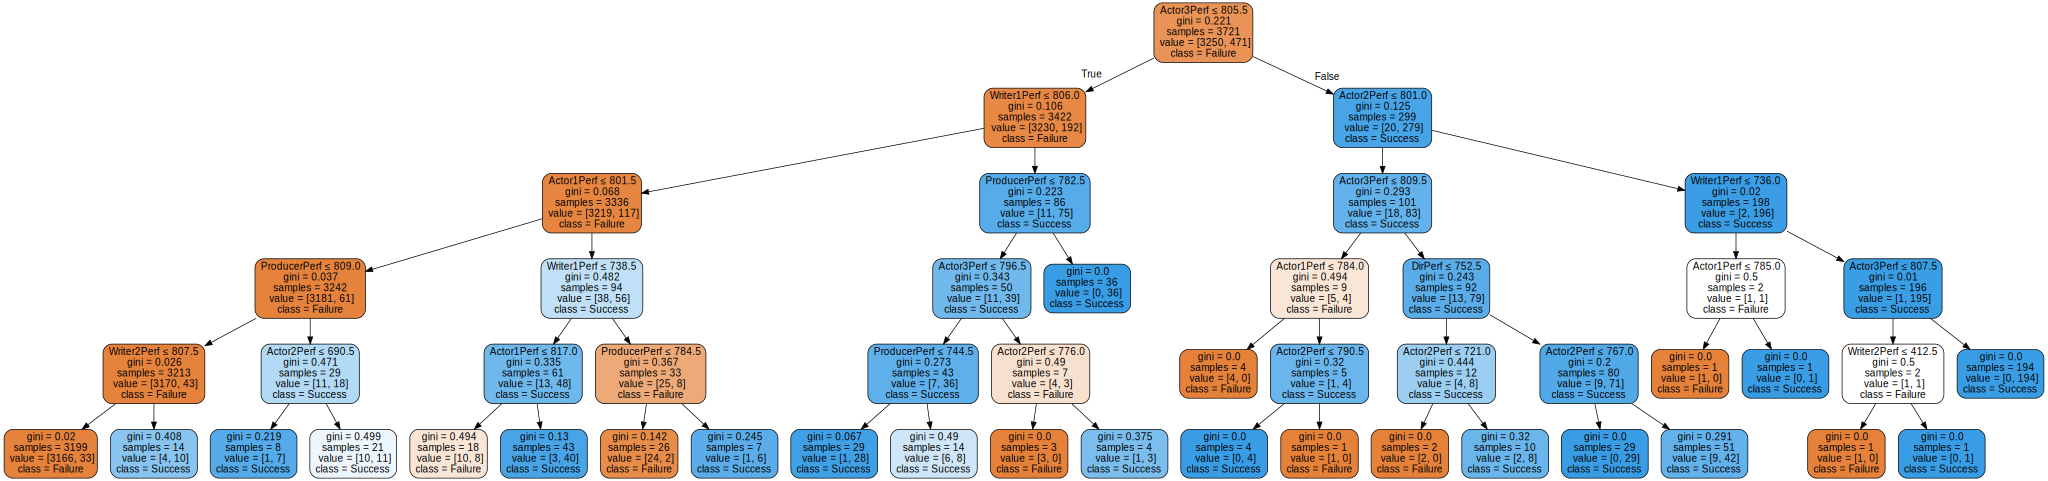

In [45]:
# Box 8

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.values, y_train.values)

source1 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot_1 = Source(source1)

tree_plot_1

To get a better viewing experince we can open up the graph in a pdf-reader:

In [12]:
# Box 9

graph = graphviz.Source(source1)
graph.render("image1",view=True)

'image1.pdf'

### 4.4 Further pre-processing

This first graph display an importance by the performance of actor nr 3, which seemed strange. After some investigation we noticed that when imdb's table of connections gives us the 10 most important persons connected to a movie, the number 1 spot is put at the back of that list. This makes actor nr 3 actually number 2, and nr 1 is probably filtered out when the 3 first actors are selected.

A quick fix for this was to change the way we read the file, shifting the array one step back while adding the last index to index 0.

We define a new "build_performance_pair"-function and have it take into account which position the actors are in. A new array is needed to be created, performed by running the code block "Box 4" again before continuing. 

In [33]:
def build_performance_pairs_new(arr, movie, index, perf_list, size):
    length = len(movie[index])
    new_arr = movie[index][0:length-1]
    new_arr.insert(0, movie[index][length-1])
    for i in range(size):
        if(i < length):
            arr.append(new_arr[i])
            arr.append(round(get_perf(new_arr[i], perf_list), 2))
        else:
            arr.append(0)
            arr.append(0)
    

In [47]:
full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs_new(movies_with_numbers, movie, 3, actor_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

### 4.5 Data Analysis

The modified data is run again to create new trees:

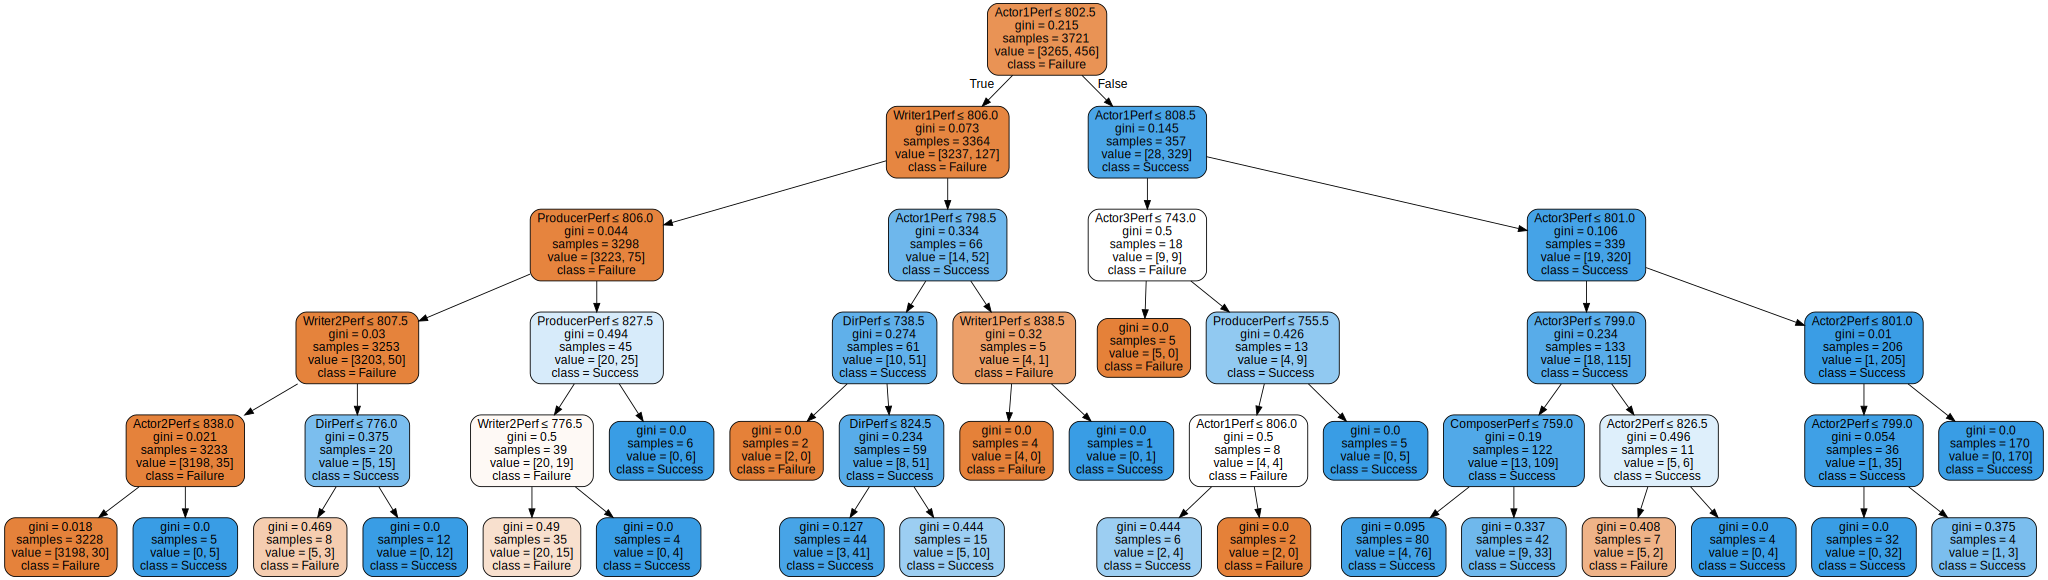

In [49]:
pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})

full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)

test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train.values, y_train.values)

source2 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source2)

tree_plot

Voila! Actor 1 performance is now the most important attribute for a movie. Once again we can open this in a pdf-reader to inspect:

In [106]:
graph = graphviz.Source(source2)
graph.render("image2",view=True)

'image2.pdf'

To further improve the results, this time we only use actors who have appeared in at least 5 movies in our data set. They have been saved from earlier generations and are read from "actors5.csv", "directors5.csv" and so on

In [56]:
actor5_avg_scores = []
director5_avg_scores = []
writer5_avg_scores = []
producer5_avg_scores = []
composer5_avg_scores = []

with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actor5_avg_scores.append(row)
with open('directors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            director5_avg_scores.append(row)
with open('writers5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            writer5_avg_scores.append(row)
with open('producers5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            producer5_avg_scores.append(row)
with open('composers5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            composer5_avg_scores.append(row)

# scores need to be numbers
for pair in actor5_avg_scores:
    pair[1] = float(pair[1])
for pair in director5_avg_scores:
    pair[1] = float(pair[1])
for pair in writer5_avg_scores:
    pair[1] = float(pair[1])
for pair in producer5_avg_scores:
    pair[1] = float(pair[1])
for pair in composer5_avg_scores:
    pair[1] = float(pair[1])

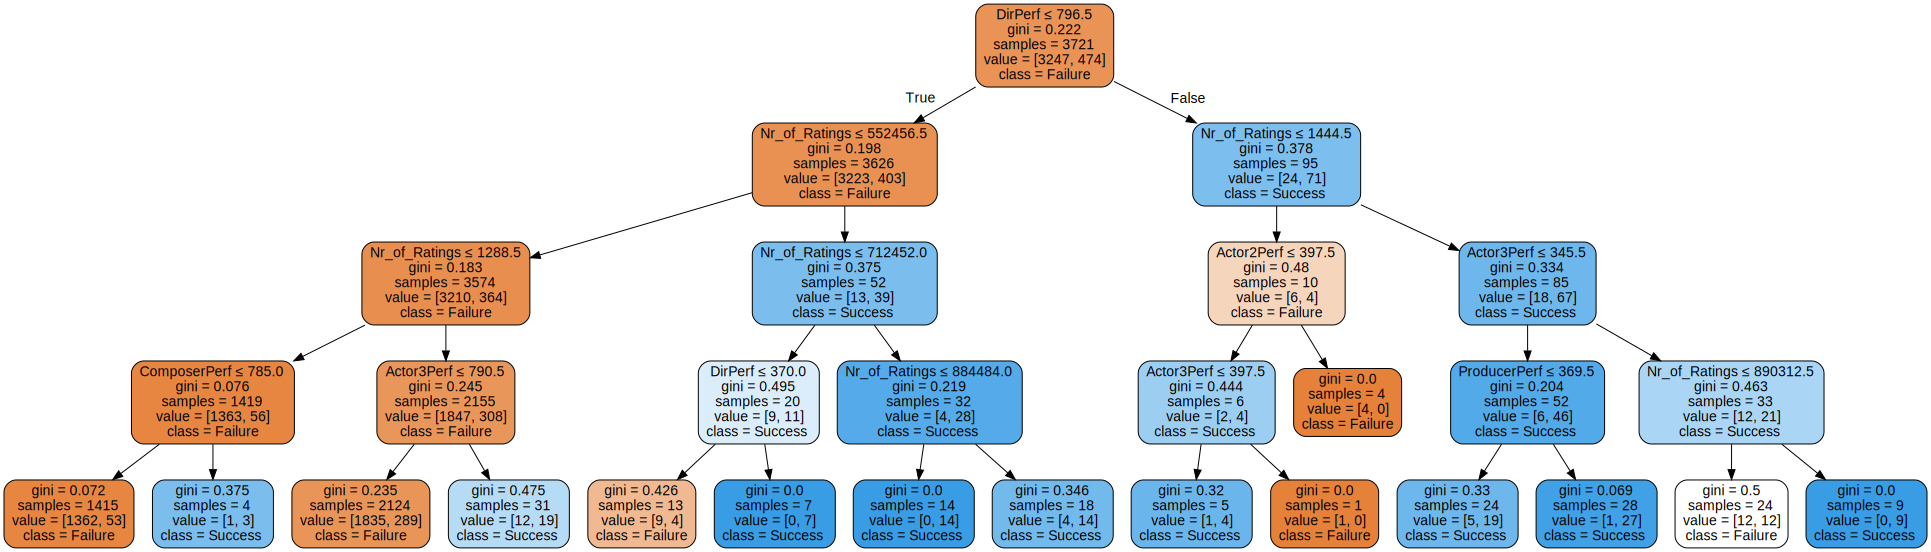

In [57]:
full_arr = []

for movie in movies:
    movies_with_numbers = []
    movies_with_numbers.append(movie[2])    
    movies_with_numbers.append(get_genre_nr(movie[0][0:2]))
    movies_with_numbers.append(movie[1])
    build_performance_pairs_new(movies_with_numbers, movie, 3, actor5_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 4, director5_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 5, writer5_avg_scores, 3)
    build_performance_pairs(movies_with_numbers, movie, 6, producer5_avg_scores, 1)
    build_performance_pairs(movies_with_numbers, movie, 7, composer5_avg_scores, 1)
    full_arr.append(movies_with_numbers)
    
full_arr_df = pd.DataFrame(full_arr)

pd.set_option('display.max_columns', 999)
full_arr_df = full_arr_df.rename(columns={0:"Rating", 1:"Genre_Group", 2:"Nr_of_Ratings", 3:"Actor1", 4:"Actor1Perf", 5:"Actor2", 6:"Actor2Perf", 7:"Actor3", 8:"Actor3Perf", 9:"Dir", 10:"DirPerf", 11:"Writer1", 12:"Writer1Perf", 13:"Writer2", 14:"Writer2Perf", 15:"Writer3", 16:"Writer3Perf", 17:"Producer", 18:"ProducerPerf", 19:"Composer", 20:"ComposerPerf"})

full_arr_df_tree = full_arr_df.filter(['Rating', 'Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])
full_arr_df_tree = full_arr_df_tree.fillna(0)
full_arr_df_tree.Rating = full_arr_df_tree.Rating.astype(float).multiply(100).astype(int)
full_arr_df_tree.Genre_Group = full_arr_df_tree.Genre_Group.astype(int)
full_arr_df_tree.Nr_of_Ratings = full_arr_df_tree.Nr_of_Ratings.astype(int)
full_arr_df_tree.Actor1Perf = full_arr_df_tree.Actor1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor2Perf = full_arr_df_tree.Actor2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Actor3Perf = full_arr_df_tree.Actor3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.DirPerf = full_arr_df_tree.DirPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer1Perf = full_arr_df_tree.Writer1Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer2Perf = full_arr_df_tree.Writer2Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.Writer3Perf = full_arr_df_tree.Writer3Perf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ProducerPerf = full_arr_df_tree.ProducerPerf.astype(float).multiply(100).astype(int)
full_arr_df_tree.ComposerPerf = full_arr_df_tree.ComposerPerf.astype(float).multiply(100).astype(int)

test_data = full_arr_df_tree.filter(['Genre_Group', 'Nr_of_Ratings', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train.values, y_train.values)

source3 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source3)

tree_plot

In [58]:
graph = graphviz.Source(source3)
graph.render("image3",view=True)

'image3.pdf'

After this a fourth tree was produced, not considering the number of ratings attribute This, in order to see effects. The different decision trees will be compared to each other in the evaluation section.

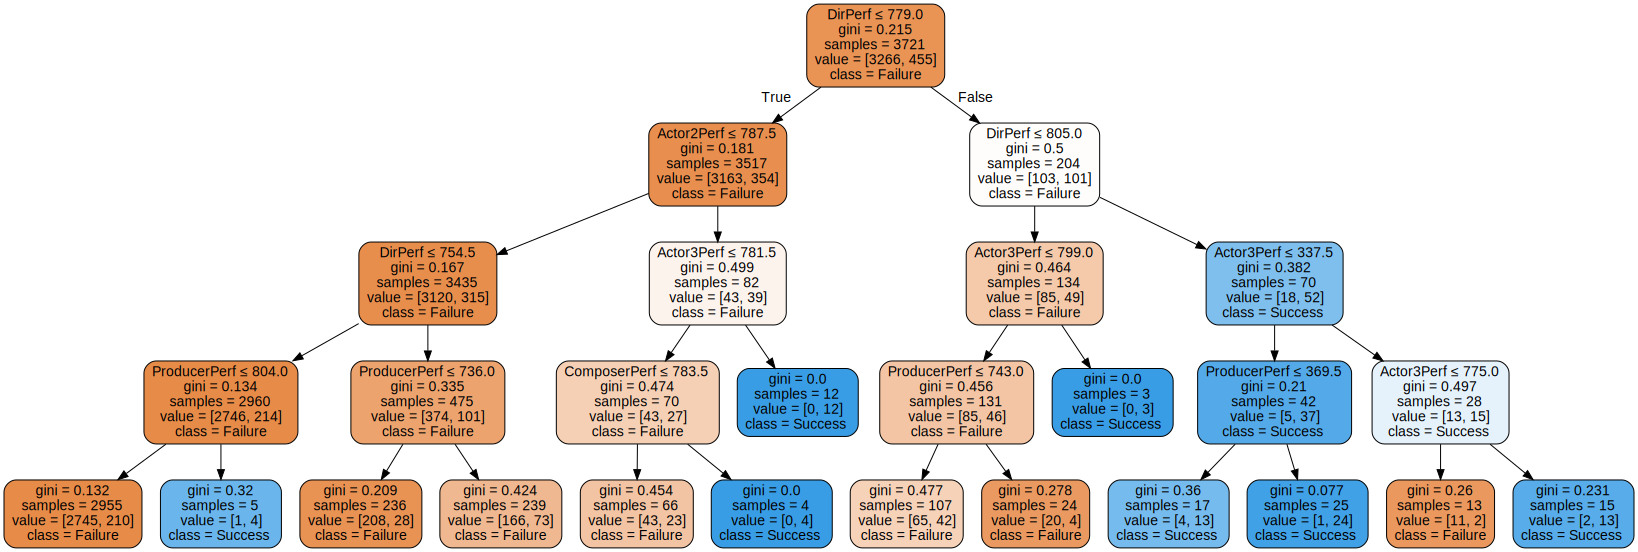

In [59]:
test_data = full_arr_df_tree.filter(['Genre_Group', 'Actor1Perf', 'Actor2Perf', 'Actor3Perf', 'DirPerf', 'Writer1Perf', 'Writer2Perf', 'Writer3Perf', 'ProducerPerf', 'ComposerPerf'])

full_arr_df_tree['Success'] = pd.cut(full_arr_df_tree.Rating, [0, 800, 1000], labels=[0, 1])

save_data = full_arr_df_tree.Success

X_train, X_test, y_train, y_test = train_test_split(test_data, save_data, test_size=0.25)
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train.values, y_train.values)

source4 = tree.export_graphviz(classifier, 
                            feature_names=X_train.columns, class_names=['Failure', 'Success'], 
                            filled=True, rounded=True, special_characters=True)
tree_plot = Source(source4)

tree_plot

In [55]:
graph = graphviz.Source(source4)
graph.render("image4",view=True)

'image4.pdf'

To display the difference in performance list we make a table with the data from actors.csv and actors5.csv:

In [64]:
actors = []
actors5 = []

with open('actors.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actors.append(row)
            
with open('actors5.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if(len(row) > 0):
            actors5.append(row)

actor_avg_scores_df = pd.DataFrame(actors)
actor_avg_scores_df = actor_avg_scores_df.sort_values(by=[1], ascending=False)
actor_avg_scores_df = actor_avg_scores_df.rename(columns={0:"All_Actors",1:"All_Ratings"})

actor5_avg_scores_df = pd.DataFrame(actors5)
actor5_avg_scores_df = actor5_avg_scores_df.sort_values(by=[1], ascending=False)
actor5_avg_scores_df = actor5_avg_scores_df.rename(columns={0:"Filtered_Actors",1:"Filtered_Ratings"})



We can se some distinct differences. In the unfiltered list there is a max of 9.5 and min of 1.9. When we applied our rule of crew members needing to have appeared in atleast 5 movies, the values min and max points shrunk significally, down to ~8.72 and up to 5.86. The size was also heavily impacted, where as before we had 13464 actors available and after only 470.

In [73]:
actor_avg_scores_df.All_Ratings

8555     9.5
8548     9.5
8549     9.5
8550     9.5
8551     9.5
        ... 
9184     2.0
9185     2.0
10726    1.9
10728    1.9
10727    1.9
Name: All_Ratings, Length: 13464, dtype: object

In [72]:
actor5_avg_scores_df.Filtered_Ratings

423     8.72857142857143
461                 8.52
258                  8.5
3      8.399999999999999
453    8.366666666666665
             ...        
369               6.3125
298                  6.3
177                 6.26
127    6.222222222222223
404                 5.86
Name: Filtered_Ratings, Length: 470, dtype: object

An inspection of our table with this rules confirms that the values are not very sparse and might not be the best approach.

In [74]:
full_arr_df[30:50]

,Rating,Genre_Group,Nr_of_Ratings,Actor1,Actor1Perf,Actor2,Actor2Perf,Actor3,Actor3Perf,Dir,DirPerf,Writer1,Writer1Perf,Writer2,Writer2Perf,Writer3,Writer3Perf,Producer,ProducerPerf,Composer,ComposerPerf
30,7.1,NaN,987,AdamFaith,0.00,RichardTodd,0.00,PeterSellers,7.37,JohnGuillermin,0.00,PeterDeSarigny,0.00,AlunFalconer,0.00,0,0.0,,7.39,JohnBarry,7.45
31,7.4,NaN,984,KalinaJedrusik,0.00,TadeuszLomnicki,0.00,KrystynaStypulkowska,0.00,AndrzejWajda,7.42,JerzyAndrzejewski,0.00,JerzySkolimowski,0.00,0,0.0,,7.39,KrzysztofKomeda,0.00
32,8.1,NaN,15844,BernhardWicki,0.00,JeanneMoreau,7.21,MarcelloMastroianni,7.51,MichelangeloAntonioni,7.52,EnnioFlaiano,7.52,ToninoGuerra,7.61,0,0.0,EmanueleCassuto,0.00,GiorgioGaslini,0.00
33,8.1,NaN,3316,ReikoDan,0.00,HidekoTakamine,0.00,TatsuyaNakadai,7.89,MikioNaruse,0.00,RyûzôKikushima,8.09,0,0.00,0,0.0,,7.39,ToshirôMayuzumi,7.54
34,7.7,NaN,27853,MaxineAudley,0.00,KarlheinzBöhm,0.00,AnnaMassey,0.00,MichaelPowell,0.00,LeoMarks,0.00,0,0.00,0,0.0,,7.39,BrianEasdale,0.00
35,7.5,NaN,1846,MargaloGillmore,0.00,SondraLee,0.00,MaryMartin,0.00,VincentJ.Donehue,0.00,JeromeRobbins,0.00,J.M.Barrie,0.00,0,0.0,DickLinkroum,0.00,,7.46
36,7.3,NaN,5399,PaulBeauvais,0.00,AnnaKarina,7.54,MichelSubor,0.00,Jean-LucGodard,7.08,,7.37,0,0.00,0,0.0,GeorgesdeBeauregard,7.47,MauriceLeroux,0.00
37,7.8,NaN,12345,ErnoCrisa,0.00,AlainDelon,7.37,MauriceRonet,7.08,RenéClément,0.00,PatriciaHighsmith,0.00,PaulGégauff,7.22,0,0.0,GoffredoLombardo,0.00,,7.46
38,7.1,NaN,991,RobertF.Kennedy,0.00,PhilleoNash,0.00,RobertDrew,0.00,,7.55,,7.37,0,0.00,0,0.0,,7.39,,7.46
39,6.8,NaN,552,RobertWark,0.00,JulesMaitland,0.00,KateManx,0.00,LeslieStevens,0.00,,7.37,0,0.00,0,0.0,StanleyColbert,0.00,,7.46


## Evalutaion

### 5.1 Testing of results

The testing of the model will be carried out by trying it with existing movies and compare their predicted scores against the actual scores of the movies. The implementation is not available at this moment, but the thought process behind it is the following: We take an existing movie that our trees not have trained on. However, this movie must also contain: 
- actors, writers, producers and directors that are present in our “performance score” lists. 
- Genre combination present in our genre-list.
- A number of ratings from any source.

If these 3 things are fulfilled, we simply plug in the numbers and let the tree decide. The tree will give the input a categorization of “Failure” or “Success” and by checking with IMDbs existing rating we can check if the output was correct.

### 5.2 Evaluation of results

Twe two main factors that has a negatively impacted the correctness and statistical validity of the results are (1) there are too few movies in the dataset and (2) the ratings of our crew members are based on our data instead of an external dataset. By calculating a “performance score” based on the crew member appearances in movies in our dataset we get a number already influenced by data we later train with. It’s like we’re leaving a part of the movies rating in the training data, which the tree is supposed to find without knowing. 

Because of this, the decision tree might have incomplete or unfair ratings of the crew members. Another issue, created by our method of calculating crew member “performance” scores, is that the tree becomes rather specific and will not be able to make a general decision on a movie that does not contain the crew members that are contained in the pre-declared lists. 

Furthermore, when analysing the data, only the attributes that the tree has decided matter are considered and therefore other attributes of importance might be overlooked, i.e. a an actor-duo that are successful together. This might be hard to achieve with just a decision tree and some other methodology is needed.

Even so the results in the report are, to some extent, actionable and can be used as a decision basis. Firstly, in tree no. 4 rightmost branch, there is  indicated that the genre-groups containing the genres action, animation and adventure are needed to succeed even with a casting with higher rating. Another result, as shown in tree no. 2 displays that some kind of team work throughout the crew is important. In almost every branch to the left (eg. Actor no. 1 is not good enough) of the root node, the movies success can be determined by writer nr 1, the director, and in some rare cases, actor nr 2. Almost all cases of a movie “failing” in this branch is because of the complete crew’s lack of rating. 


### 5.3 Suggestion for further research

A suggestion for increasing the correctness of the analysis is to acquire ratings of the crew from an outside source instead of a rating which is dependent on the dataset in the report. Further it could be beneficial to classify the crew members with labels based on the ratings, such as poor, mediocre, good and excellent in order to nuance the analysis and make it easier to understand for the client (eg. Netflix). Another approach that could add more value to the client would be to predict a movies success based on several different success-criterions which would enable the model to be used in areas of interest (eg. box office, views etc.)


### 5.2 Attribute weighting 

In a previous study they found that when using a decision tree, genre was the most important node, and that a movie’s budget was no indication of its future rating. (Meenakshi et al. 2018) It also found that actor/actress and director were important attributes and therefore should have a higher weighting.

In our tree nr 2, Actor/actress turned out to be the most important node in the tree. Specifically what we refer to as Actor 1, which is the the top billed actor/actress in a movie on IMDb. However, after we implemented a rule saying a crew member has to appear in at least 5 movies (in our data set) Actor 2 was now the most important node (actor 2 being the second billed actor in the movie on IMDb). We believe this is an effect of our slightly limited dataset. This shows most of the top billed actors were not starring in 5 movies or more. Consequently they were not taken into account. With so few rated Actor 1s the decision tree instead moved to the second billed actor as the most important node. Important to note here is that we have not manually weighted our attributes, we have simply passed the cleaned and pre-processed data set through our decision tree. 

Similarly to  Actor 1, writers and directors got moved down a notch, with directors being removed completely from the tree requiring participation in 5 movies. We believe the reason the most heavily processed tree has been so weighted in favour of actors is that there were simply too few writers and directors participating in 5 movies or more, leading to the decision tree giving them a lower weighting since their dwindling numbers aren’t high enough to impact the bigger dataset.


## 6 Ethical aspects

In this project there are no handling of personal- or other sensitive data which minimizes both the legal and ethical implications. There is no collecting data from private persons at all except indirectly via Imdb. Thus the responsibility is solely on making sure Imdb handles their personal data responsibly. 

Even so, the risk of the algorithm getting biased should be taken in consideration when carrying out this project. The effect of the decision tree “learning” a pattern of a successful movie might be that some movies are filtered out completely, hence, have a negative effect on the representation of e.g. movies with female leading characters or movies of ethnic diversity. It could be argued there’s a responsibility in this, and furthermore also towards the movies, to give out correct results. I.e. not to give an actual successful movie a bad rating on account of inadequate data analysis.


## 7 List of references

https://www.nyteknik.se/popularteknik/fran-succe-till-kris-netflix-i-gungning-6978061

Fernández-Manzano, Eva-Patricia; Neira, Elena; Clares-Gavilán, Judith (2016). “Data management in audiovisual business: Netflix as a case study”. El profesional de la información, v. 25, n. 4, pp. 568-576. http://dx.doi.org/10.3145/epi.2016.jul.06

Inkludera följande om tillgängligt: Artikelförfattares efternamn och förnamn. Utgivningsår. Artikeltitel. Tidskriftstitel Volym (Nummer): artikelns sidnr.
Lundmark, Linda. 2005. Economic restructuring into tourism in the Swedish mountain range. Scandinavian Journal of Hospitality and Tourism 5 (1): 23–45. doi: 10.1080/15022250510014273.

Krauss, Johan Sebastian; Fischbach, Kai; Simon, Daniel; Gloor, Peter. 2008. Predicting Movie Success and Academy Awards through Sentiment and Social Network Analysis. 16th European Conference on Information Systems. https://www.researchgate.net/profile/Jonas_Krauss/publication/200038418_Predicting_Movie_Success_and_Academy_Awards_through_Sentiment_and_Social_Network_Analysis/links/0912f5057074b0a0f6000000.pdf

Meenakshi, K; Maragatham, G; Agarwal, Neha and Ghosh, Ishitha. 2018. A Data mining Technique for Analyzing and Predicting the success of Movie. Journal of Physics: Conference Series, Volume 1000, conference 1. doi :10.1088/1742-6596/1000/1/012100.
https://iopscience-iop-org.ezproxy.its.uu.se/article/10.1088/1742-6596/1000/1/012100/pdf

http://thebusinessleadership.academy/wp-content/uploads/2019/08/Structure-That%E2%80%99s-Not-Stifling.pdf )


https://digitalcommons.assumption.edu/cgi/viewcontent.cgi?article=1039&context=honorstheses  
